#### Quistian Navarro Juan Luis
## **Filtros de convolución**

En este notebook, se aplican y se describen varios filtros de convolución en imágenes utilizando OpenCV. Los filtros incluyen Bilateral Filter, Blur, Dilate, Erode, GaussianBlur, MedianBlur y SpatialGradient.

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [17]:
img_path = "images/572-1024x1024.jpg" # path source of the image

In [18]:
# Function to display the image
def plot_img(img, cmap = None):
    plt.figure()
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show(block=False)
    print(img.shape)

### **Image Original**

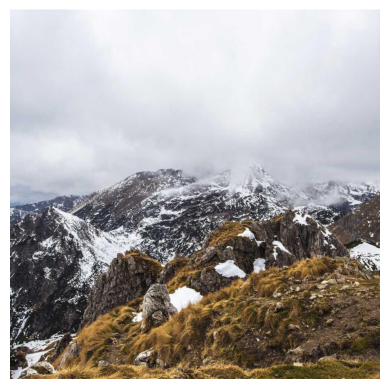

(1024, 1024, 3)


In [19]:
img = cv2.imread(img_path) # read image
plot_img(cv2.cvtColor(img,cv2.COLOR_BGR2RGB), cmap='gray')  # Convert BGR to RGB for display

### **Bilateral Filter**

El filtro bilateral es un filtro no lineal que suaviza la imagen mientras preserva los bordes. A diferencia de otros filtros de suavizado, el filtro bilateral tiene en cuenta tanto la distancia espacial de los píxeles como la diferencia de intensidad de los píxeles para mantener los bordes nítidos.


Sintaxis:

In [ ]:
cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)

* **src**: Imagen de entrada.
* **d**: Tamaño del vecindario de los píxeles (un número entero).
* **sigmaColor**: Desviación estándar en el espacio de color.
* **sigmaSpace**: Desviación estándar en el espacio de coordenadas.

#### Aplicación:

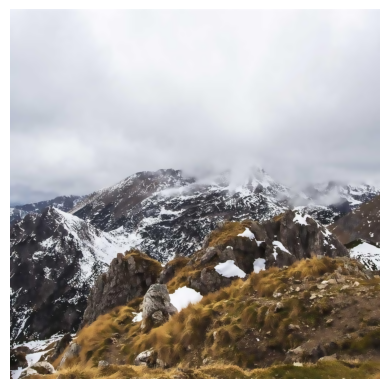

(1024, 1024, 3)


In [20]:
bilateral_img = cv2.bilateralFilter(img, 15, 75, 75)
plot_img(cv2.cvtColor(bilateral_img,cv2.COLOR_BGR2RGB))

### **Blur**

El filtro de desenfoque (Blur) aplica un desenfoque uniforme en la imagen, promediando los valores de píxeles en una ventana definida. Es útil para reducir el ruido y suavizar la imagen.

Sintaxis:

In [ ]:
cv2.blur(src, ksize)


* **src**: Imagen de entrada.
* **ksize**: Tamaño del núcleo (ventana) del filtro.

#### Aplicación:

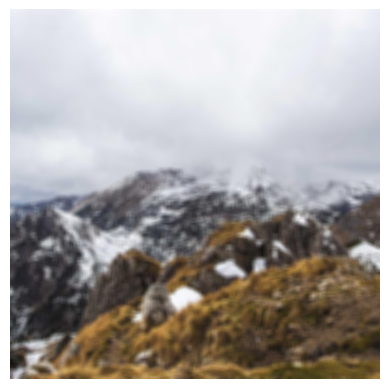

(1024, 1024, 3)


In [21]:
kernel = (15,15)
blur_img = cv2.blur(img, kernel)
plot_img(cv2.cvtColor(blur_img,cv2.COLOR_BGR2RGB))

### **Dilate**

El filtro de dilatación aumenta el tamaño de los objetos en una imagen binaria. Expande las áreas blancas (valores altos) y es útil para rellenar agujeros en objetos binarios.

Sintaxis:

In [ ]:
cv2.dilate(src, kernel, iterations)

* **src**: Imagen binaria de entrada.
* **kernel**: Núcleo del filtro.
* **iterations**: Número de iteraciones de dilatación.

#### Apliación:
Para ver mejor el efecto, usemos una imagen binaría random.

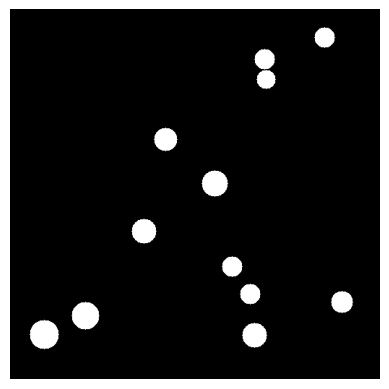

(512, 512)


In [22]:
shape = (512, 512)
random_binary_img = np.zeros(shape, dtype=np.uint8) # image in zeros, with size 512 * 512
num_shapes = random.randint(4, 15) # number of shapes to be drawn on the image
for _ in range(num_shapes):
    center = (random.randint(20, shape[0]-50), random.randint(20, shape[0] -50))
    radius = random.randint(10,20)
    cv2.circle(random_binary_img, center, radius, (255), thickness=-1)


plot_img(random_binary_img, cmap='gray')

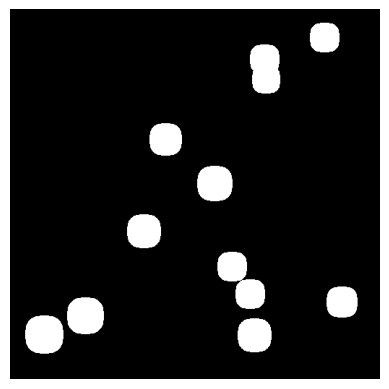

(512, 512)


In [23]:
kernel = np.ones((5, 5), np.uint8)
dilate_img = cv2.dilate(random_binary_img, kernel, iterations=3) # dilte with kernel size of 5 * 5 and 3 iterations
plot_img(dilate_img, cmap='gray')

### **Eorode**

El filtro de erosión reduce el tamaño de los objetos en una imagen binaria. Contrae las áreas blancas (valores altos) y es útil para eliminar pequeñas áreas blancas y detalles en una imagen binaria.

Sintaxis: 

In [ ]:
cv2.erode(src, kernel, iterations)

* **src**: Imagen binaria de entrada.
* **kernel**: Núcleo del filtro.
* **iterations**: Número de iteraciones de erosión.

#### Aplicación:

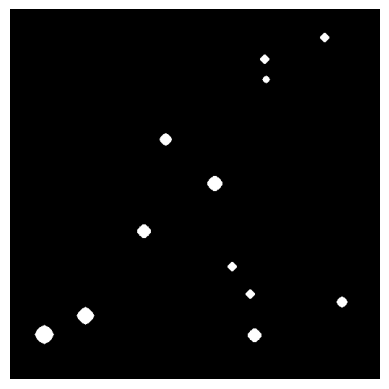

(512, 512)


In [24]:
erode_img = cv2.erode(random_binary_img, kernel, iterations= 3)
plot_img(erode_img, cmap='gray')

### **GaussianBlur**

El filtro GaussianBlur aplica un desenfoque usando un kernel gaussiano, que proporciona un desenfoque más suave y natural comparado con el desenfoque uniforme. Reduce el ruido y suaviza la imagen.

Sintaxis: 

In [ ]:
cv2.GaussianBlur(src, ksize, sigmaX, sigmaY)

* **src**: Imagen de entrada.
* **ksize**: Tamaño del núcleo del filtro (debe ser impar).
* **sigmaX**: Desviación estándar en la dirección X.
* **sigmaY**: Desviación estándar en la dirección Y.

#### Apliación: 

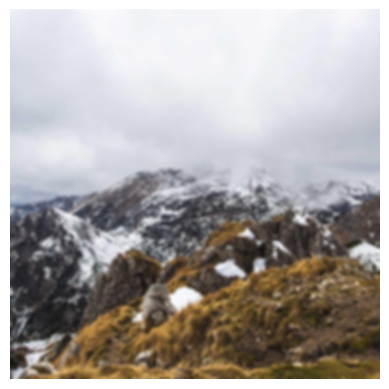

(1024, 1024, 3)


In [25]:
kernel = (15,15)
gaussian_blur_img = cv2.GaussianBlur(img, kernel, sigmaX=5, sigmaY=5)
plot_img(cv2.cvtColor(gaussian_blur_img,cv2.COLOR_BGR2RGB))

### **MedianBlur**

El filtro MedianBlur aplica un desenfoque basado en la mediana de los valores de los píxeles en una ventana definida. Es eficaz para eliminar el ruido sal y pimienta en la imagen.

Sintaxis: 

In [ ]:
cv2.medianBlur(src, ksize)

* **src**: Imagen de entrada.
* **ksize**: Tamaño del núcleo del filtro (debe ser impar).

#### Apliación: 

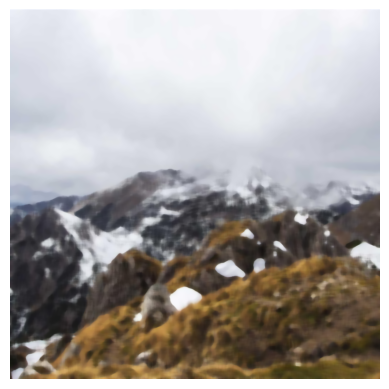

(1024, 1024, 3)


In [26]:
medianblur_img = cv2.medianBlur(img,15)
plot_img(cv2.cvtColor(medianblur_img,cv2.COLOR_BGR2RGB))

### **SpatialGradient**

El filtro SpatialGradient calcula el gradiente espacial de la imagen, que representa la magnitud del cambio en intensidad en la dirección X y Y. Es útil para detectar bordes en la imagen.

Sintaxis: 

In [ ]:
cv2.Sobel(src, ddepth, dx, dy, ksize)

* **src** : Imagen de entrada en escala de grises.
* **ddepth**: Profundidad de la imagen de salida.
* **dx**: Orden de derivada en la dirección X.
* **dy**: Orden de derivada en la dirección Y.
* **ksize**: Tamaño del núcleo del filtro.


#### Aplicación: 

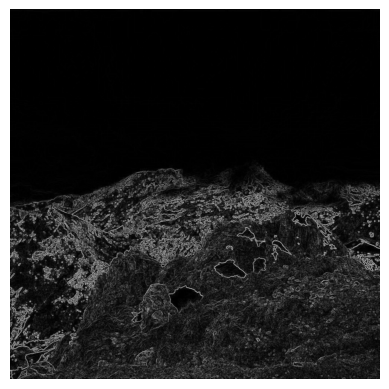

(1024, 1024)


In [27]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

grad_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)

grad_magnitude = cv2.magnitude(grad_x, grad_y)

grad_magnitude = cv2.normalize(grad_magnitude, None, 0, 255, cv2.NORM_MINMAX)
grad_magnitude = np.uint8(grad_magnitude)

plot_img(grad_magnitude, cmap='gray')

### Referencias: 
**OpenCV "Image filtering"**: 
https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html